In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [6]:
X = iris["data"][:, 3:] #petal width

In [9]:
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [15]:
y_proba = log_reg.predict_log_proba(X_new)

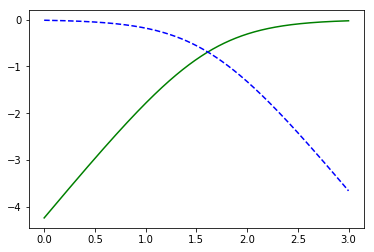

In [20]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [21]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

In [37]:
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

In [8]:
X.shape

(150, 2)

In [23]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
softmax_reg.predict([[5, 2]])

array([2])

In [25]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])

### My Softmax Regression

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
oh_enc = OneHotEncoder()

In [147]:
X_dev = X[:]
X_dev = X_dev.T

In [148]:
X_dev.shape

(2, 150)

In [169]:
y_dev = y[:]

In [173]:
y_dev.shape

(150, 1)

In [171]:
y_dev = y_dev.reshape(-1, 1)

In [176]:
y_dev = oh_enc.fit_transform(y_dev).toarray()

In [177]:
y_dev = y_dev.T

In [178]:
X_dev.shape, y_dev.shape

((2, 150), (3, 150))

In [9]:
# init weights
def init_weights(num_classes, num_features):
    return np.random.rand(num_classes, num_features)

In [97]:
def softmax(scores):
    scores_exp = np.exp(scores)
    scores_probes = scores_exp / np.sum(scores_exp, axis=0, keepdims=True)
    return scores_probes

In [125]:
def predict(scores_probes):
    return np.argmax(scores_probes, axis=0)

In [114]:
def cross_entropy(y, score_probes, m):
    return (-1 * np.sum(y * np.log(score_probes))) / m

In [120]:
def compute_gradient(X, y, score_probes, m):
    return (score_probes - y).dot(X.T) / m

In [202]:
W = init_weights(3, 2)
m= 150
lr = 0.001
for i in range(1000000):
    scores = W.dot(X_dev)
    scores_probes = softmax(scores)
    if i % 10000 == 0:
        print(cross_entropy(y_dev, scores_probes, m))
    grads = compute_gradient(X_dev, y_dev, scores_probes, m)
    W = W - lr * grads

1.84954055302
0.917218916376
0.860401558432
0.817553991402
0.783927486519
0.756676304109
0.734034063256
0.714854870952
0.69836188506
0.684006907841
0.671389366944
0.660207779541
0.650229550842
0.641271484256
0.633186771305
0.625856035761
0.619180996554
0.613079873125
0.607483982019
0.602335168178
0.597583834172
0.593187406306
0.589109125595
0.585317084094
0.58178344915
0.578483833356
0.575396778736
0.572503331397
0.569786688434
0.567231903053
0.564825636929
0.562555951151
0.560412128884
0.558384524275
0.556464433148
0.554643981932
0.55291603187
0.551274096127
0.549712267808
0.548225157263
0.546807837297
0.545455795166
0.544164890383
0.542931317555
0.541751573545
0.540622428398
0.539540899542
0.538504228829
0.537509862072
0.536555430768
0.535638735728
0.534757732407
0.533910517713
0.533095318138
0.53231047905
0.531554455029
0.530825801118
0.530123164893
0.529445279273
0.528790955979
0.528159079585
0.527548602089
0.526958537969
0.526387959652
0.525835993376
0.525301815398
0.524784648514


In [192]:
grads

array([[-0.00093755,  0.00357973],
       [ 0.00037302, -0.00150325],
       [ 0.00056453, -0.00207648]])

In [187]:
sum(abs(predict(softmax(W.dot(X_dev))) -predict(y_dev)))/ m

0.25333333333333335

In [184]:
predict(y_dev)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])